https://hyperconnect.github.io/2019/07/16/survival-analysis-part1.html

In [2]:
import pandas as pd
data = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice', 'Bob', 'Charlie', 'Dan', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan']
)

In [3]:
print(data)

         time  event
Alice       1   True
Bob         4   True
Charlie     7   True
Dan        12  False
Eve        14   True
Frank      20  False
Grace      26   True
Heidi      40  False
Ivan       45  False


Survival function 추정

In [4]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

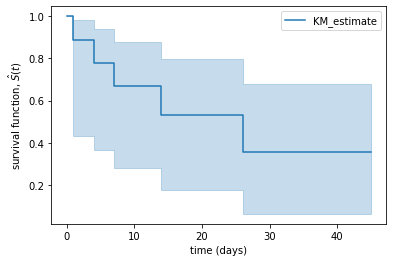

In [5]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(data["time"], data["event"])

plot = kmf.plot_survival_function()
plot.set_xlabel('time (days)')
plot.set_ylabel('survival function, $\hat{S}(t)$')
plot

Cumulative hazard function 추정

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

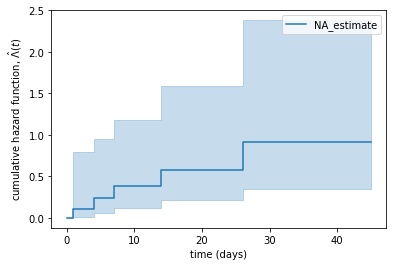

In [6]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"], data["event"])

plot = naf.plot_cumulative_hazard()
plot.set_xlabel('time (days)')
plot.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
plot

# 이탈방지 평가

In [8]:
data_A = pd.DataFrame(
    {
        'time': [2, 4, 9, 12, 19, 23, 26, 41, 48],
        'event': [True, True, False, False, False, True, True, False, False]
    },
    index = ['Alice_A', 'Bob_A', 'Charlie_A', 'Dan_A', 'Eve_A', 'Frank_A', 'Grace_A', 'Heidi_A', 'Ivan_A']
)

data_B = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice_B', 'Bob_B', 'Charlie_B', 'Dan_B', 'Eve_B', 'Frank_B', 'Grace_B', 'Heidi_B', 'Ivan_B']
)

In [9]:
print(data_A)
print(data_B)

           time  event
Alice_A       2   True
Bob_A         4   True
Charlie_A     9  False
Dan_A        12  False
Eve_A        19  False
Frank_A      23   True
Grace_A      26   True
Heidi_A      41  False
Ivan_A       48  False
           time  event
Alice_B       1   True
Bob_B         4   True
Charlie_B     7   True
Dan_B        12  False
Eve_B        14   True
Frank_B      20  False
Grace_B      26   True
Heidi_B      40  False
Ivan_B       45  False


효과분석

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

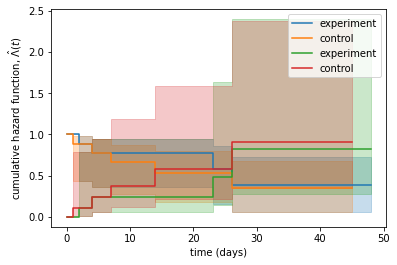

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(data_A["time"], data_A["event"], label="experiment")
ax_kmf = kmf.plot()
kmf.fit(data_B["time"], data_B["event"], label="control")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

naf = NelsonAalenFitter()
naf.fit(data_A["time"], data_A["event"], label="experiment")
ax_naf = naf.plot()
naf.fit(data_B["time"], data_B["event"], label="control")
ax_naf = naf.plot(ax=ax_naf)

ax_naf.set_xlabel('time (days)')
ax_naf.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
ax_naf

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

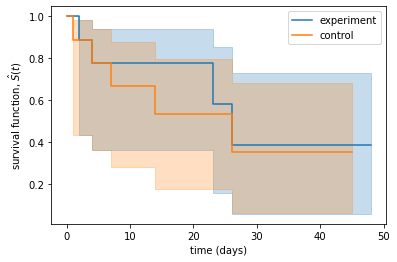

In [11]:
kmf = KaplanMeierFitter()
kmf.fit(data_A["time"], data_A["event"], label="experiment")
ax_kmf = kmf.plot()
kmf.fit(data_B["time"], data_B["event"], label="control")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

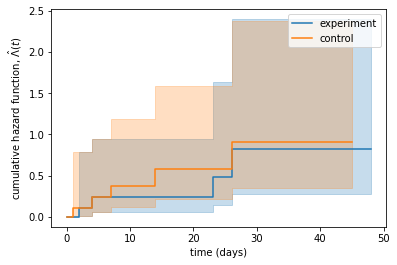

In [12]:
naf = NelsonAalenFitter()
naf.fit(data_A["time"], data_A["event"], label="experiment")
ax_naf = naf.plot()
naf.fit(data_B["time"], data_B["event"], label="control")
ax_naf = naf.plot(ax=ax_naf)

ax_naf.set_xlabel('time (days)')
ax_naf.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
ax_naf

유의성 검증

In [13]:
from lifelines.statistics import logrank_test
logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"]).p_value

0.6791912509835747

https://hyperconnect.github.io/2019/08/22/survival-analysis-part2.html

In [14]:
import numpy as np
import pandas as pd

def generate_features(num_samples):
    genders = np.random.randint(0, 2, num_samples)
    ages = np.random.gamma(15, 1.6, num_samples).round()
    nums_friends = np.random.gamma(3, 10, num_samples).round()
    nums_liked = np.random.gamma(5, 30, num_samples).round()
    nums_calls = np.multiply(nums_friends, np.random.normal(15, 2, num_samples).clip(1)).round()
    
    return pd.DataFrame({
        'gender': genders,
        'age': ages,
        'num_friends': nums_friends,
        'num_liked': nums_liked,
        'num_calls': nums_calls
    })

def get_normal_prob(mean, stdev):
    return np.clip(np.random.normal(mean, stdev), 0.1, 0.99)

def get_death_prob(t, features):
    zipped = pd.DataFrame({
        'gender': features['gender'].apply(
            lambda x:
                get_normal_prob(0.9, 0.01) if x == 0
                else get_normal_prob(0.85, 0.01)
        ),
        'age' : features['age'].apply(
            lambda x: ((0 <= x < 10 and get_normal_prob(0.7, 0.02)) or
                       (10 <= x < 20 and get_normal_prob(0.85, 0.03)) or
                       (20 <= x < 30 and get_normal_prob(0.9, 0.05)) or
                       (30 <= x < 40 and get_normal_prob(0.75, 0.05)) or
                       (40 <= x < 50 and get_normal_prob(0.7, 0.05)) or            
                       get_normal_prob(0.2, 0.05)) - np.random.normal(0.02 * np.log(t), 0.005)
        ),
        'num_friends': features['num_friends'].apply(
            lambda x: np.clip(np.log(max(1, x)) * 0.2, 0.1, 0.99)
        ),
        'num_liked': features['num_liked'].apply(
            lambda x: np.clip(np.log(max(1, x)) * (1/6), 0.1, 0.99)
        ),
        'num_calls': features['num_calls'].apply(
            lambda x: np.clip(np.log(max(1, x)) * (1/8) + np.random.normal(0.03 * np.log(t), 0.005), 0.1, 0.99)
        )
    })
    
    return zipped['gender'] * 0.3 + zipped['age'] * 0.35 + zipped['num_friends'] * 0.05 + zipped['num_liked'] * 0.05 + zipped['num_calls'] * 0.25

def generate_dataset(num_samples, death_threshold, max_time):
    data = generate_features(num_samples)
    data['event'] = False
    data['time'] = 1
    time = 1
    
    while time < max_time:
        time = time + 1
        prob = get_death_prob(time, data)
        data['time'] = data['time'] + ~(data['event'] | (prob < death_threshold)) * 1
        data['event'] = data['event'] | (prob < death_threshold)

    return data